In [ ]:
# !pip install SALib

In [11]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [3]:
problem = {
  'num_vars': 3,
  'names': ['x1', 'x2', 'x3'],
  'bounds': [[-np.pi, np.pi]]*3
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

          ST   ST_conf
x1  0.555860  0.087097
x2  0.441898  0.043036
x3  0.244675  0.028805
          S1   S1_conf
x1  0.316832  0.064712
x2  0.443763  0.056943
x3  0.012203  0.054650
                S2   S2_conf
(x1, x2)  0.009254  0.087808
(x1, x3)  0.238172  0.102095
(x2, x3) -0.004888  0.071336


/var/folders/19/plp0fk812hq1rlftnp9ck8j40000gn/T/ipykernel_14219/77809936.py:8: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

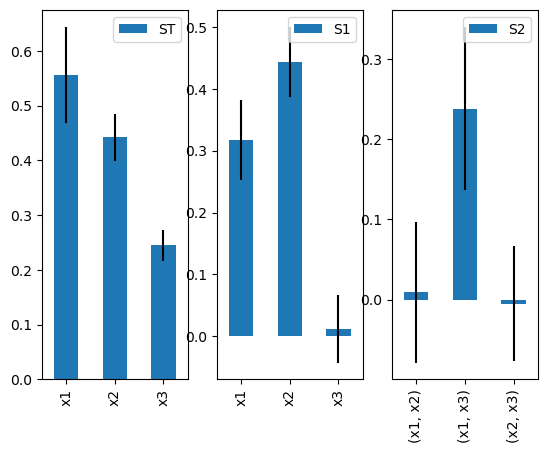

In [4]:
Si.plot()

In [16]:
from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.plotting.morris import (
    horizontal_bar_plot,
    covariance_plot,
    sample_histograms,
)
import matplotlib.pyplot as plt

X = sample(problem, 1000)
Y = Ishigami.evaluate(X)
Si = morris.analyze(problem, X, Y, print_to_console=True)


          mu   mu_star     sigma  mu_star_conf
x1  7.854025  7.854025  6.250122  4.212915e-01
x2 -0.441000  7.875000  7.866577  1.749568e-15
x3 -0.237454  6.511246  9.022190  3.393649e-01


<Axes: >

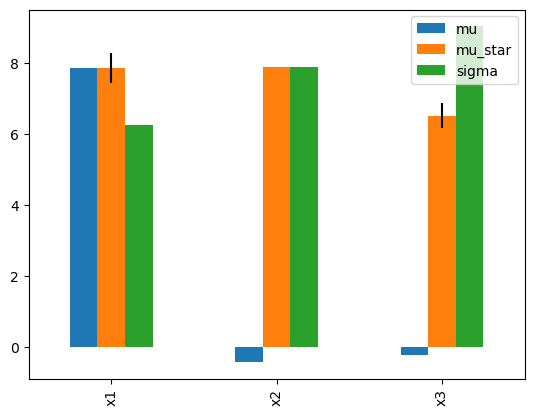

In [17]:
Si.plot()

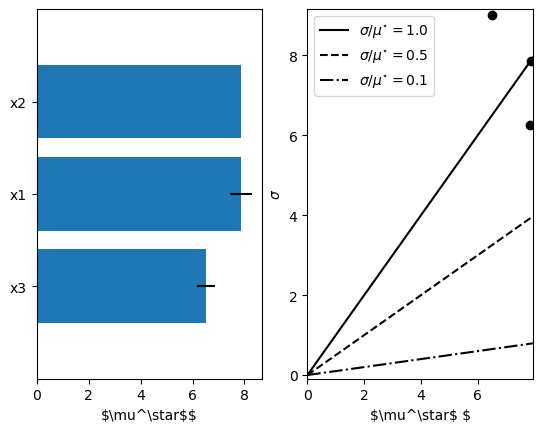

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
horizontal_bar_plot(ax1, Si, {}, sortby="mu_star", unit=r"$")
covariance_plot(ax2, Si, {}, unit=r"$")

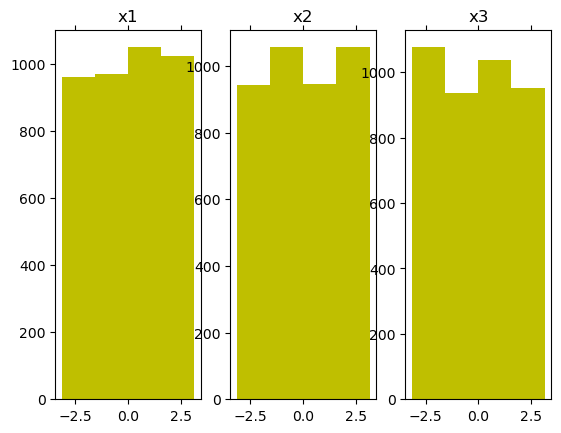

In [19]:
fig2 = plt.figure()
sample_histograms(fig2, X, problem, {"color": "y"})
plt.show()

           ST   ST_conf
c1   0.394367  0.255749
c2   0.011683  0.005823
c3   0.019440  0.013772
c4   0.187720  0.102563
c5   0.181160  0.083124
c6   0.087193  0.050621
c7   0.047399  0.030703
c8   0.003882  0.002545
c9   0.001858  0.000796
c10  0.265071  0.114524
           S1   S1_conf
c1   0.339229  0.343661
c2  -0.023387  0.059767
c3  -0.008545  0.047756
c4   0.169853  0.252692
c5   0.096634  0.249439
c6   0.123890  0.123806
c7   0.050943  0.099810
c8  -0.016724  0.025182
c9  -0.018774  0.016822
c10  0.167266  0.273976
                 S2   S2_conf
(c1, c2)   0.132385  0.425998
(c1, c3)   0.089188  0.416607
(c1, c4)   0.065126  0.487695
(c1, c5)   0.046835  0.399208
(c1, c6)   0.117677  0.490655
(c1, c7)   0.063132  0.422943
(c1, c8)   0.084957  0.426427
(c1, c9)   0.101464  0.437478
(c1, c10)  0.076107  0.661991
(c2, c3)  -0.036195  0.079431
(c2, c4)  -0.016060  0.083723
(c2, c5)  -0.031435  0.082400
(c2, c6)  -0.052898  0.097199
(c2, c7)  -0.034320  0.082900
(c2, c8)  -0.034761  0

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

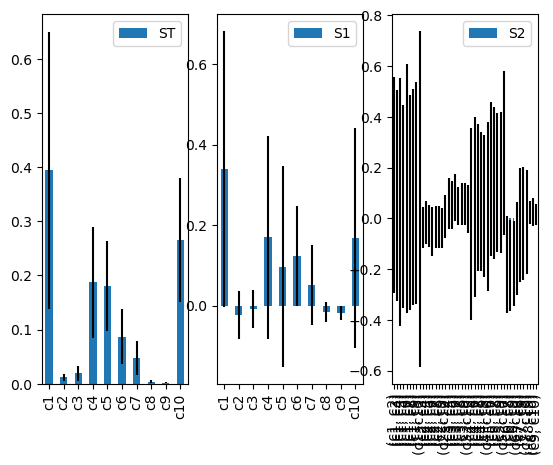

In [35]:
from pyDecision.algorithm import moora_method
from SALib.sample.sobol import sample


# Weights
weights = [0.297, 0.025, 0.035, 0.076, 0.154, 0.053, 0.104, 0.017, 0.025, 0.214]

# Load Criterion Type: 'max' or 'min'
criterion_type = ['max', 'max', 'max', 'max', 'max', 'max', 'max', 'max', 'min', 'min']

# # Dataset
# dataset = np.array([
#                     [3.5, 6, 1256, 4, 16, 3, 17.3, 8, 2.82, 4100],   #a1
#                     [3.1, 4, 1000, 2, 8,  1, 15.6, 5, 3.08, 3800],   #a2
#                     [3.6, 6, 2000, 4, 16, 3, 17.3, 5, 2.9,  4000],   #a3
#                     [3,   4, 1000, 2, 8,  2, 17.3, 5, 2.6,  3500],   #a4
#                     [3.3, 6, 1008, 4, 12, 3, 15.6, 8, 2.3,  3800],   #a5
#                     [3.6, 6, 1000, 2, 16, 3, 15.6, 5, 2.8,  4000],   #a6
#                     [3.5, 6, 1256, 2, 16, 1, 15.6, 6, 2.9,  4000]    #a7
#                    ])

madm_problem = {
  'num_vars': len(criterion_type),
  'names': ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8','c9','c10'],
  'bounds': [[3,6], [1,6], [500,2500], [0,4], [8,16], [0,3], [10,20], [2,8], [2,3.5], [2000,4500]]
}

# Generate samples
param_values = sample(madm_problem, 32)

# Run model (example) 
res = moora_method(param_values, weights, criterion_type, graph=False, verbose=False)
second_values = res[:, 1]
Y = second_values.flatten()

# Perform analysis
Si = sobol.analyze(madm_problem, Y, print_to_console=True)
Si.plot()